In [5]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

sorted2midpoints (generic function with 1 method)

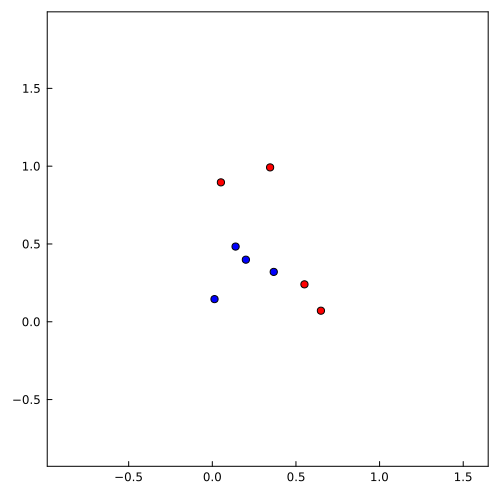

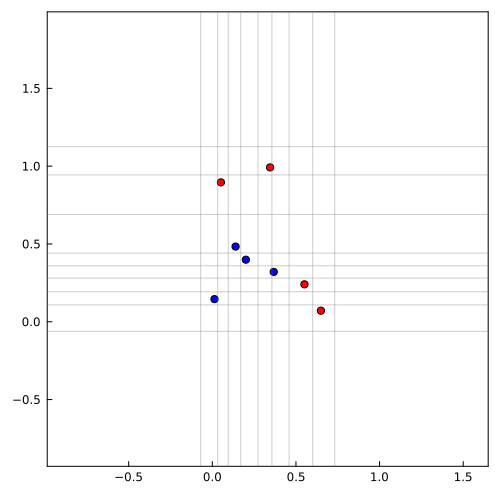

In [88]:
n = 8

S = rand(n,2)
w = rand([-1,1], n)

p1 = plot_rb_points(S, w)

sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

p2 = plot_rb_points(S, w)
vline!(midpoints_x, color=:gray, alpha = .4)
hline!(midpoints_y, color=:gray, alpha = .4)

display(p1)
display(p2)

8×4 Matrix{Any}:
 1  0.05  0.9   'r'
 2  0.37  0.32  'b'
 3  0.2   0.4   'b'
 4  0.35  0.99  'r'
 5  0.14  0.48  'b'
 6  0.65  0.07  'r'
 7  0.01  0.15  'b'
 8  0.55  0.24  'r'


i = 1, j = 5, k = 4, l = 9
--------------------------
                   1  2  3  4  5  6  7  8  9    midpoint index
sortperm_x        = [7, 1, 5, 3, 4, 2, 8, 6]
sortperm_x[i:j-1] = [7, 1, 5, 3]

                   1  2  3  4  5  6  7  8  9    midpoint index
sortperm_y        = [6, 7, 8, 2, 3, 5, 1, 4]
sortperm_y[k:l-1] = [2, 3, 5, 1, 4]

intersection = [1, 5, 3]

     1   2   3  4   5  6   7  8    point index
w = [1, -1, -1, 1, -1, 1, -1, 1]

Disc_ijkl = sum(w[intersection]) = -1


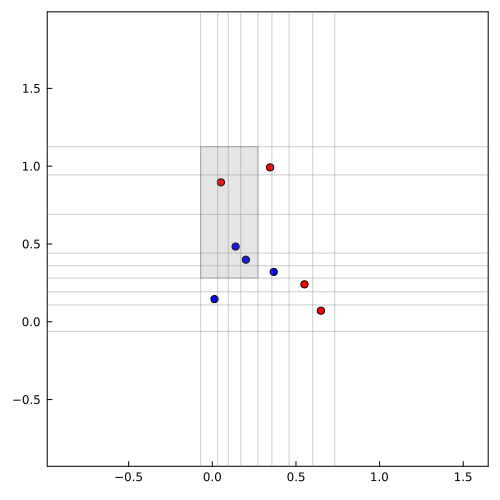

In [137]:
i = 1; j = 5; k = 4; l =9

M = Matrix{Any}(undef,n,4); M[:,1] = 1:n; M[:,2:3]= round.(S,digits=2); foo(x) = x==1 ? 'r' : 'b'; M[:,4] = foo.(w) 
display(M)

println("\ni = $i, j = $j, k = $k, l = $l\n--------------------------")
print("                   "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_x        = $sortperm_x")
println("sortperm_x[i:j-1] = $(sortperm_x[i:j-1])\n")
print("                   "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_y        = $sortperm_y")
println("sortperm_y[k:l-1] = $(sortperm_y[k:l-1])\n")


int = intersect(sortperm_x[i:j-1],sortperm_y[k:l-1])
println("intersection = $int\n")

print("     "); for i=1:n print((w[i]==-1 ? " " : ""),i,"  ") end; print("  point index\n")
println("w = $w\n" )
println("Disc_ijkl = sum(w[intersection]) = $(sum(w[int]))")

plot_rb_points(S, w)
vline!(midpoints_x, color=:gray, alpha = .4)
hline!(midpoints_y, color=:gray, alpha = .4)
xx = [midpoints_x[i], midpoints_x[i], midpoints_x[j], midpoints_x[j]]
yy = [midpoints_y[k], midpoints_y[l], midpoints_y[l], midpoints_y[k]]
plot!(Shape(xx,yy), color=:gray, alpha = .2)

In [171]:
## Hay que pensar con cuidado la complejidad de esta funcion!!
Disc_ijkl(i,j,k,l) = sum(w[intersect(sortperm_x[i:j-1],sortperm_y[k:l-1])])


println("Este mismo anidado hay que recorrer para C[i,j,k,l]\n")
for i = 1:n
    println("--------------------------------------   i = $i")
    for j = i+1:n+1
        println("                                         j = $j")
        for k = 1:n
            print("k = $k -->  ")
            for l = k+1:n+1
                print(lpad(Disc_ijkl(i,j,k,l), 3, " "))
            end
            println("")
        end
        
    end
end

Este mismo anidado hay que recorrer para C[i,j,k,l]

--------------------------------------   i = 1
                                         j = 2
k = 1 -->    0 -1 -1 -1 -1 -1 -1 -1
k = 2 -->   -1 -1 -1 -1 -1 -1 -1
k = 3 -->    0  0  0  0  0  0
k = 4 -->    0  0  0  0  0
k = 5 -->    0  0  0  0
k = 6 -->    0  0  0
k = 7 -->    0  0
k = 8 -->    0
                                         j = 3
k = 1 -->    0 -1 -1 -1 -1 -1  0  0
k = 2 -->   -1 -1 -1 -1 -1  0  0
k = 3 -->    0  0  0  0  1  1
k = 4 -->    0  0  0  1  1
k = 5 -->    0  0  1  1
k = 6 -->    0  1  1
k = 7 -->    1  1
k = 8 -->    0
                                         j = 4
k = 1 -->    0 -1 -1 -1 -1 -2 -1 -1
k = 2 -->   -1 -1 -1 -1 -2 -1 -1
k = 3 -->    0  0  0 -1  0  0
k = 4 -->    0  0 -1  0  0
k = 5 -->    0 -1  0  0
k = 6 -->   -1  0  0
k = 7 -->    1  1
k = 8 -->    0
                                         j = 5
k = 1 -->    0 -1 -1 -1 -2 -3 -2 -2
k = 2 -->   -1 -1 -1 -2 -3 -2 -2
k = 3 -->    0  0 -1 -2 -1 -1
k